In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import os, shutil

In [10]:
# Path to where the original dataset was uncompressed
original_dataset_dir = r'C:\Users\Pedro.braga\Downloads\kaggle_original_data'

# directory where we will store our smaller dataset
base_dir = r'C:\Users\Pedro.braga\Downloads\cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy first dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:' ,len(os.listdir(train_dogs_dir)))
print('total validation car images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation car images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


2000 training images, and 1000 validation images and 1000 test images.

In each split, there is the same number of samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be and appropriate measure of success.

## Bulilding our network

Our convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

Since we are dealing with bigger images than in the MNIST example, we'll make our network accordingly larger: it will have on more Conv2D + MaxPooling stage. This serves both to augmetn the capacity of the network, and to further reduce the size of the feature maps, so that they aren't overly large when we reach the Flatten layer.

Here, since we start from input of size 150x150 (arbitrary choice), we end up with feature maps of size 7x7 right brefore the Flatten layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 7x7). This is a pattern that you will see in almost all convnets.

Since this is a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', 
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       147584    
__________

For our compilation step, we'll go with RMSprop optimizer as usual. Since we ended our network with a single sigmoid unit, we'll use binary crossentropy as our loss (as a reminder, check out the table, in Chapter 4, section 5 for a cheatsheet on what loss function to use in various situations).

In [15]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## Data preprocessing

Data should be formatted into appropriately preprocessed floating point tensors before being fed into out network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

- read the picture files
- decode the JPEG content to RBG grid of pixels
- Convert these into floating point tensors
- Rescale the pixel values (betweeen 0 to 255) to the [0,1] interval (as you know, neural networks prefer to deal with small input values);

Keras has utilities to take care of these steps automatically.
Keras has a module with image preprocessing helper tools, located at Keras.preprocessing.image.
In particular, it contains the class ImageDataGenerator which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors.
This is what we'll use here.


In [16]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
# this is the target directory
train_dir, 
#all images will be resized to 150x150
target_size=(150, 150),
batch_size=20,
#since we use binary_crossentropy loss, we need binary labels
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


batches of 150x150 RBG images (shape (20, 150, 150, 3)) binary labels (shape (20,))

20 is the number of samples in each batch (the batch size).

Note that the generator yields these batches indefinitely: it just lops endlessly over the images present in the target folder.
For this reason, we need to break the iteration loop at some point.

In [18]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


Let's fit our model to the data using the generator. We do it using the fit_generator method, the equivalent of fit for data generators like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch gradient descent steps, the fitting process will go to the next epoch. In our case, batches are 20-sample large, so it will take 100 batches unitl we see our target of 2000 samples.

When using fit_generator, one may pass a validation_data arguetn, much like with the fit method. Importantly, this argument is allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as validation_data, then this generator is expectd to yield batches of validation data endlessly, and thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [19]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data = validation_generator,
validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 98s 978ms/step - loss: 0.6842 - acc: 0.5530 - val_loss: 0.6842 - val_acc: 0.5470
Epoch 2/30
100/100 [==============================] - 95s 954ms/step - loss: 0.6433 - acc: 0.6270 - val_loss: 0.6255 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 95s 947ms/step - loss: 0.5928 - acc: 0.6845 - val_loss: 0.5947 - val_acc: 0.6860
Epoch 4/30
100/100 [==============================] - 94s 944ms/step - loss: 0.5621 - acc: 0.7065 - val_loss: 0.5788 - val_acc: 0.6900
Epoch 5/30
100/100 [==============================] - 94s 936ms/step - loss: 0.5365 - acc: 0.7280 - val_loss: 0.5915 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 95s 945ms/step - loss: 0.5084 - acc: 0.7525 - val_loss: 0.6336 - val_acc: 0.6670
Epoch 7/30
100/100 [==============================] - 95s 947ms/step - loss: 0.4884 - acc: 0.7580 - val_loss: 0.5545 - val_acc: 0.7050
Epoch 8

In [20]:
model.save('cats_and_dogs_small1.h5')

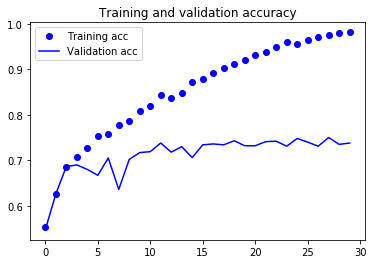

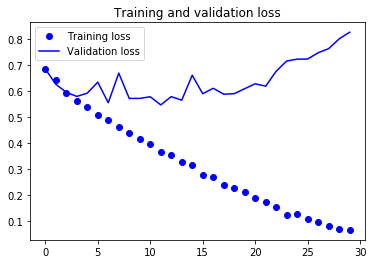

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting os going to be our number on concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We are now going to introduce a new one, specific to computer vision, and used almost universally when processing images with deep learning models: data augmentation.

## Using data augmentation

Overfitting is caused by having too few samples to learn from  , rending us unable to train a model able to generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generatoing more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield beliviable-looking images. The goal is that a training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our ImageDataGenerator instance. Let's get started with an example:

In [26]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

These are jsut a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures.
- width_shift and heigth_shift are ranges (as a fraction of total width or heigth) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range os for randomly zooming inside pictures.
- horizontal_flip is for randomlly flipping half of the images horizontally -- relevant when there are no assumptions of the horizontal asymmetry (eg. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which ,can appear after a rotation or a width/heigth shift.

Let's look at out augmented images:

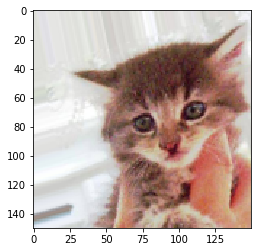

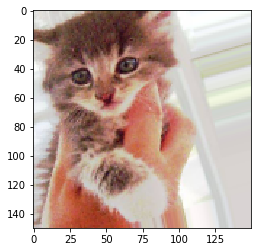

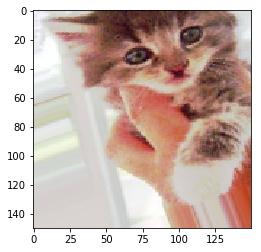

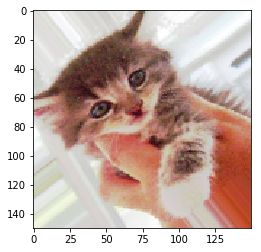

In [27]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# we pick one imate to "augment"
img_path = fnames[3]

# read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# convert it to a numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# the .flow() command bellow generates batches of randomly transformed images
# it will loop indefinitevely, so we need to "break" the loop at some point!

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs taht it sees are still heavily intercorrelated, since they com efrom a small number of original images -- we cannot produce new information, we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting. To further fight overfitting, we will also add a Dropout layer to our model, right before the densely-connected classifier:

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                      input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Let's train our network using data augmentation and dropout:

In [35]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
#this is the target directory
train_dir,
# all images will be resized to 150x150
target_size=(150, 150),
batch_size = 32,
# since we use binary_crossentropy loss, we need binary labels
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 151s 2s/step - loss: 0.6920 - acc: 0.5359 - val_loss: 0.6961 - val_acc: 0.4981
Epoch 2/100
100/100 [==============================] - 144s 1s/step - loss: 0.6703 - acc: 0.5778 - val_loss: 0.6460 - val_acc: 0.6250
Epoch 3/100
100/100 [==============================] - 113s 1s/step - loss: 0.6598 - acc: 0.5953 - val_loss: 0.6381 - val_acc: 0.6383
Epoch 4/100
100/100 [==============================] - 100s 997ms/step - loss: 0.6366 - acc: 0.6406 - val_loss: 0.6337 - val_acc: 0.6115
Epoch 5/100
100/100 [==============================] - 101s 1s/step - loss: 0.6248 - acc: 0.6475 - val_loss: 0.6137 - val_acc: 0.6345
Epoch 6/100
100/100 [==============================] - 91s 913ms/step - loss: 0.6008 - acc: 0.6841 - val_loss: 0.5840 - val_acc: 0.6894
Epoch 7/100
100/100 [==============================] - 87s 869ms/step - loss: 0.5974 - acc: 0.6819 - val_lo

100/100 [==============================] - 87s 866ms/step - loss: 0.4027 - acc: 0.8131 - val_loss: 0.4993 - val_acc: 0.7773
Epoch 61/100
100/100 [==============================] - 88s 883ms/step - loss: 0.3991 - acc: 0.8141 - val_loss: 0.4591 - val_acc: 0.7829
Epoch 62/100
100/100 [==============================] - 86s 859ms/step - loss: 0.4001 - acc: 0.8100 - val_loss: 0.4574 - val_acc: 0.8001
Epoch 63/100
100/100 [==============================] - 86s 860ms/step - loss: 0.3931 - acc: 0.8237 - val_loss: 0.4699 - val_acc: 0.7899
Epoch 64/100
100/100 [==============================] - 86s 864ms/step - loss: 0.3811 - acc: 0.8306 - val_loss: 0.4329 - val_acc: 0.8131
Epoch 65/100
100/100 [==============================] - 86s 865ms/step - loss: 0.4050 - acc: 0.8106 - val_loss: 0.4638 - val_acc: 0.7925
Epoch 66/100
100/100 [==============================] - 86s 858ms/step - loss: 0.3968 - acc: 0.8250 - val_loss: 0.5142 - val_acc: 0.7539
Epoch 67/100
100/100 [==============================] 

In [36]:
model.save('cats_and_dogs_small2.h5')

Let's plot ou results again:

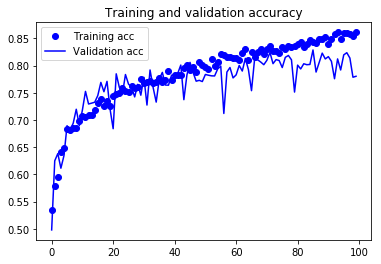

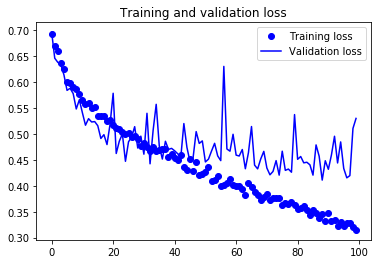

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation curves. We are now able to reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.

By leveraging regularization techniques even further and by tuning the network's parameters (such as the number of filters per convolution layer, or the number of layers in the network), we may be able to get an even better accuracy, likely up to 86-87%. However, it would prove very difficult to go any higher just by training our own convnet from scratch, simply because we have so little data to work with. As a next step to improve accuracy on this problem, we will have to leverage a pre-trained model, which will be the focus of the next two sections.

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [40]:
validation_generator[0]

(array([[[[0.16862746, 0.2509804 , 0.56078434],
          [0.0627451 , 0.14509805, 0.47058827],
          [0.09019608, 0.16862746, 0.50980395],
          ...,
          [0.1764706 , 0.24705884, 0.5686275 ],
          [0.12156864, 0.19215688, 0.5137255 ],
          [0.22352943, 0.29411766, 0.6156863 ]],
 
         [[0.18039216, 0.2627451 , 0.57254905],
          [0.07843138, 0.16078432, 0.48627454],
          [0.10588236, 0.18431373, 0.52156866],
          ...,
          [0.18431373, 0.25490198, 0.5764706 ],
          [0.12941177, 0.20000002, 0.52156866],
          [0.227451  , 0.29803923, 0.61960787]],
 
         [[0.18823531, 0.2627451 , 0.57254905],
          [0.08627451, 0.15686275, 0.4784314 ],
          [0.10588236, 0.18431373, 0.52156866],
          ...,
          [0.19215688, 0.2627451 , 0.5921569 ],
          [0.13725491, 0.20784315, 0.5372549 ],
          [0.23529413, 0.30588236, 0.63529414]],
 
         ...,
 
         [[0.24705884, 0.2901961 , 0.6039216 ],
          [0.16078